# 手寫阿拉伯數字辨識 專家模式

## 載入套件

In [1]:
import os
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import MNIST

## 設定參數

In [2]:
# 設定參數
PATH_DATASETS = "" # 預設路徑
BATCH_SIZE = 1024  # 批量
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 下載 MNIST 手寫阿拉伯數字 訓練資料
train_ds = MNIST(PATH_DATASETS, train=True, download=True,
                 transform=transforms.ToTensor())

# 下載測試資料
test_ds = MNIST(PATH_DATASETS, train=False, download=True,
                 transform=transforms.ToTensor())

# 訓練/測試資料的維度
print(train_ds.data.shape, test_ds.data.shape)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 45.5MB/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.68MB/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.8MB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.75MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


## 步驟2：建立模型結構

In [43]:
from torch.nn.modules.activation import ReLU
# 建立模型
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 512) # 完全連接層
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)  # Dropout層
        self.fc2 = torch.nn.Linear(512, 128) # 完全連接層
        self.relu2 = nn.ReLU()
        self.fc3 = torch.nn.Linear(128, 10) # 完全連接層

    def forward(self, x):
        # 完全連接層 + dropout + 完全連接層
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# 建立模型物件
model = Net().to(device)

## 設定模型及學習率組態

## 步驟3：結合訓練資料及模型，進行模型訓練

In [44]:
epochs = 15
lr=0.01

# 建立 DataLoader
train_loader = DataLoader(train_ds, batch_size=150)

# 設定優化器(optimizer)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9) # (e)

# 設定損失函數(loss)
criterion = nn.CrossEntropyLoss()

model.train()
loss_list = []
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        # 計算損失(loss)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0 %)  Loss: 2.300088
Epoch 1: [ 1500 / 60000] (2 %)  Loss: 2.295166
Epoch 1: [ 3000 / 60000] (5 %)  Loss: 2.266707
Epoch 1: [ 4500 / 60000] (8 %)  Loss: 2.220416
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 2.134180
Epoch 1: [ 7500 / 60000] (12 %)  Loss: 2.102320
Epoch 1: [ 9000 / 60000] (15 %)  Loss: 1.942736
Epoch 1: [10500 / 60000] (18 %)  Loss: 1.757153
Epoch 1: [12000 / 60000] (20 %)  Loss: 1.470672
Epoch 1: [13500 / 60000] (22 %)  Loss: 1.105364
Epoch 1: [15000 / 60000] (25 %)  Loss: 1.008612
Epoch 1: [16500 / 60000] (28 %)  Loss: 0.796035
Epoch 1: [18000 / 60000] (30 %)  Loss: 0.728312
Epoch 1: [19500 / 60000] (32 %)  Loss: 0.625333
Epoch 1: [21000 / 60000] (35 %)  Loss: 0.631087
Epoch 1: [22500 / 60000] (38 %)  Loss: 0.840385
Epoch 1: [24000 / 60000] (40 %)  Loss: 0.478906
Epoch 1: [25500 / 60000] (42 %)  Loss: 0.443778
Epoch 1: [27000 / 60000] (45 %)  Loss: 0.444387
Epoch 1: [28500 / 60000] (48 %)  Loss: 0.594885
Epoch 1: [30000 / 60000] (50 %)  Loss: 0.673

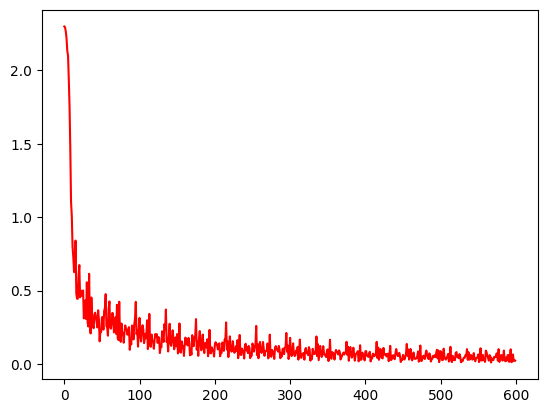

In [45]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.plot(loss_list, 'r')

##步驟4：評分(Score Model)

In [46]:
# 建立 DataLoader
test_loader = DataLoader(test_ds, batch_size=600)

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)

        # sum up batch loss
        test_loss += criterion(output, target).item()

        # 預測
        pred = output.argmax(dim=1, keepdim=True)

        # 正確筆數
        correct += pred.eq(target.view_as(pred)).sum().item()

# 平均損失
test_loss /= len(test_loader.dataset)
# 顯示測試結果
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'平均損失: {test_loss:.4f}, 準確率: {correct}/{data_count}' +
      f' ({percentage:.0f}%)\n')

平均損失: 0.0001, 準確率: 9802/10000 (98%)

